# Linear Regression With One Variable

This is a python implementation of the Linear Regression exercise in week 2 of Coursera's online Machine Learning 
course, taught by Dr. Andrew Ng. We are provided with data for population of cities and profit made in each city by
a restaurant. The task is to use linear regression to determine new cities the restaurant should expand to. Our goal is to to dtermine how population affects profit. 

In [1]:
#Let's start by importing relevant python libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's import the data into a Pandas dataframe called data. There are 2 columns in the dataset, Population
and Profit. 

In [2]:
data = pd.read_csv('ex1data1.txt', names=['Population', 'Profit']) 

In [3]:
data.head() ## View the first of records in the dataset.

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


We need to visualize the relationship between Population and Profit. We will use matplotlib to create a 
scatter plot.

Text(0.5, 1.0, 'Scatter Plot of Training Data')

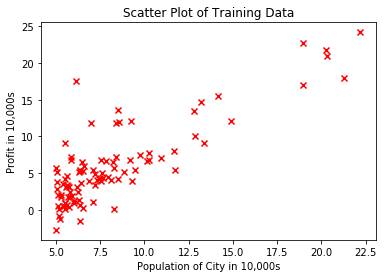

In [4]:
X = data['Population'].values ##A ssign the values in the 'Population' column to X
y = data['Profit'].values ## Assign the values in the 'Profit' column to y
m = len(y) ## This is the length of the training set
plt.scatter(X,y, c='red', marker='x')## Plot Population against Profit using a scatter plot
plt.ylabel('Profit in 10,000s') ##Label on the y axis
plt.xlabel('Population of City in 10,000s') ## Label on the X axis
plt.title('Scatter Plot of Training Data') ## Title for the plot

#The plot is shown below:

This graph shows that population is positively correlated with profit.

The next step is to append the bias term to X, make it the first feature of the array, and reshape X and y to mx1. We also need to initialize theta (the coefficient) to zero.

In [5]:
X = np.append(np.ones([m,1]), X.reshape(m,1), axis=1)#Append the bias term to X and reshape X to a mx1 matrix
y = y.reshape(m,1)#Reshape y to mx1 matrix
theta = np.zeros([2,1])#Set initial coefficient to zero

# Cost Function

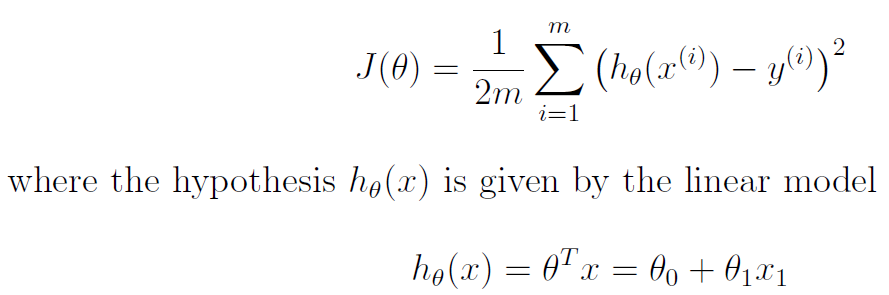

The next task is to use gradient descent to minimize the cost (error of prediction). Before we do that let's 
determine the current cost.

In [6]:
def computeCost(X,y, theta):
    '''
    This function takes in the the values of 
    the training set as well as initial values 
    of theta and returns the cost(J).
    '''
    m = len(y)#This is the length of the training set
    h = X.dot(theta)#The hypothesis
    J = 1/(2*m)*(np.sum((h-y)**2))#The cost function
    return J #return the cost

cost = computeCost(X,y, theta)#Call the function and pass in values for X, y, and theta to compute the cost.

print(cost)#Print out the cost

32.072733877455676


Now that we know the cost (32.072733877455676), we will attempt to minimize this value using the gradient descent algorithm. 

# Gradient Descent

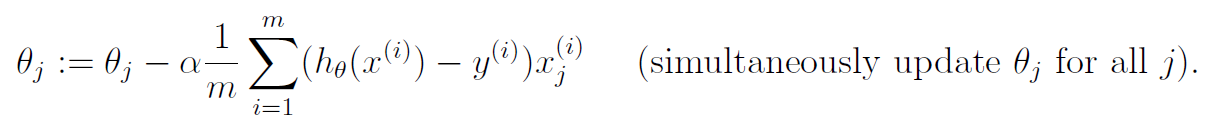

We will use alpha to represent the learning rate and run the algorithm for 1500 iterations.

In [7]:
def gradientDescent(X, y, theta, alpha, iter):
    '''
    This function takes in the training data, the intial theta values(coefficients), the learning rate, 
    and the number of iterations. The output will be the a new set of coefficeient of the linear regression (theta),
    optimized for making predictions.
    '''
    
    J_history = []## Array for storing the cost values on each iteration.
    m = len(y)## This is the length of the training set
    
    for i in range(iter): ## Loop for 1500 iterations
        h = X.dot(theta) ## The hypothesis
        theta = theta - (alpha/m)*(X.T.dot(h-y))   #Gradient descent function
        J_history.append(computeCost(X, y, theta))  #Append the cost to the J_history array
    return theta, J_history     #return the final values of theta and the J_history array


iter = 1500 ## Initialize the iteration parameter.
alpha = 0.01 ## Initialize the learning rate.

## Call the function and pass in the parameters to compute new coefficient values.
new_theta, J_history = gradientDescent(X, y, theta, alpha, iter) 

print(new_theta)

[[-3.63029144]
 [ 1.16636235]]


Using the new values of the coefficient to compute the cost, we see a huge improvement. From 32.07 to 4.48

In [8]:
new_cost = computeCost(X,y, new_theta)
print(new_cost)

4.483388256587725


Now we plot the linear regression on the training data

Text(0.5, 1.0, 'Training Data with Linear Regression Fit')

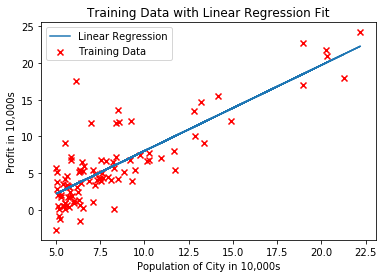

In [9]:
plt.scatter(X[:,1].reshape([m,1]),y, c='red', marker='x', label='Training Data')
plt.plot(X[:,1].reshape([m,1]), np.dot(X, new_theta), label='Linear Regression')
plt.ylabel('Profit in 10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.title('Training Data with Linear Regression Fit')

The regression line shows a reasonably good fit to the data.

# Predictions

Now we define a function for predictiing profit giving population of a city.

In [12]:
First_City = 3500
Second_City = 70000

def prediction(X, new_theta):
    '''
    This fucntion takes in population and predicts profit.
    '''
    pred = np.dot(X,new_theta)* 10000 #We use the new coffeicients derived from the gradient descent algorithm.
    return pred #The prediction

## Call the prediction function and pass in the population value, the bias, as well as the derived coefficients.
predict1 = (prediction(([1, 3.5]),(new_theta))) 
predict2 = (prediction(([1, 7]),(new_theta)))

print(f'For a population of {First_City} people, profit will be {predict1[0]} ')#Print prediction1
print(f'For a population of {Second_City} people, profit will be {predict2[0]}')#Print prediction2

For a population of 3500 people, profit will be 4519.7678677017675 
For a population of 70000 people, profit will be 45342.45012944714
